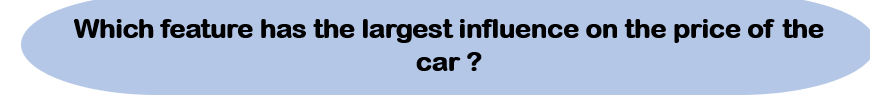

### > We'll discover  what the most common features of expensive and cheap cars have.

In [1]:
# Importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df=pd.read_csv("../input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv")
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner


In [3]:
# Check the shape of the data
df.shape

(4340, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


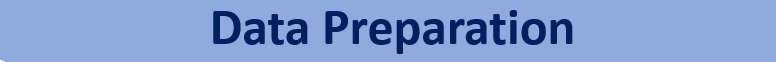

In [5]:
# Check for missing values
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
# Check for any duplicates
df.duplicated().sum()

763

In [7]:
# Remove duplicate records
df.drop_duplicates(keep="first", ignore_index=True, inplace=True)

#check the size of the dataset again
df.shape

(3577, 8)

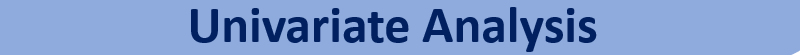

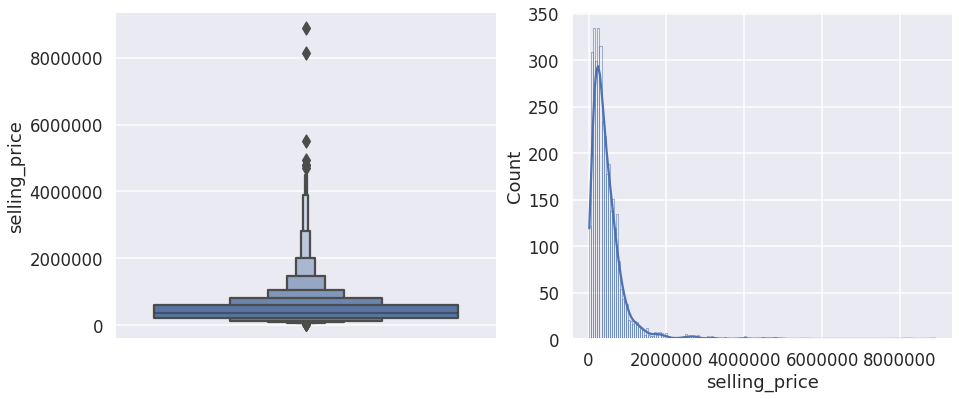

In [8]:
sns.set_theme()
sns.set_context("talk")
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.boxenplot(data=df, y="selling_price", ax=ax[0])
ax[0].ticklabel_format(useOffset=False, style='plain', axis='y')
sns.histplot(data=df, x="selling_price", kde=True, fill=False, ax=ax[1])
ax[1].ticklabel_format(useOffset=False, style='plain', axis='x')
sns.despine()
plt.show()

### > The chart above shows that the selling price is skewed to the right.

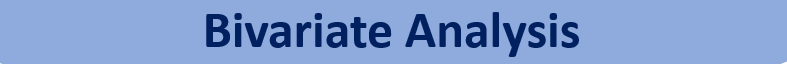

In [9]:
pd.set_option('precision', 2)

# Create a function to visualize categorical data over dependent variables
def create_plot(df, x, y):
    sns.set_theme()
    sns.set_palette("tab20")
    sns.set_context("talk")
    fig, ax = plt.subplots(1,2, figsize=(20, 8), sharey=True)    
    sns.boxenplot(data=df, x=x, y=y, ax=ax[0])
    ax[0].ticklabel_format(useOffset=False, style='plain', axis='y')
    ax[0].set_xticklabels(labels=list(df[x].unique()), rotation=60)    
    sns.stripplot(data=df, x=x,   y=y, ax=ax[1])
    plt.xticks(rotation=60)
    plt.show()
    
# Create function to visualize numerical data over dependent variables
def create_regplot(df, x, y):
    plt.figure(figsize=(10,6))
    sns.regplot(data=df, x=x, y=y)
    plt.show()


# Create function to show the description of the total, quartile, 
# mean, median and std each category 
def create_desc(df, x, y):
    total =df.groupby(x)[x].count()
    minimum = df.groupby(x)[y].quantile(0.25)
    maximum = df.groupby(x)[y].quantile(0.75)
    mean= df.groupby(x)[y].mean()
    median= df.groupby(x)[y].median()
    std= df.groupby(x)[y].std()

    name = list(total.index)

    desc_table = pd.DataFrame(list(zip(name, total.values, minimum.values, maximum.values,
                                       mean.values, median.values,std.values)),
                         columns=["name", "total", "q1", "q3", "mean", "median", "std"])
    desc_table.fillna(value=0, inplace=True)
    
    return desc_table.style.background_gradient(cmap="PuBu")

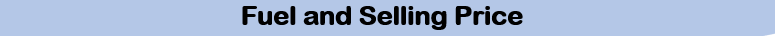

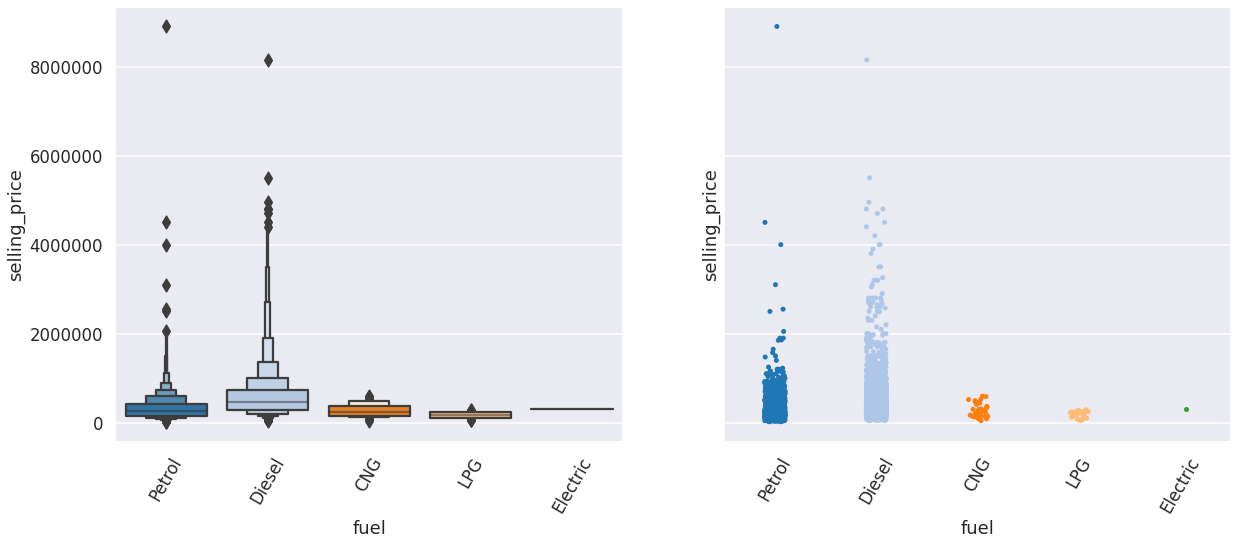

In [10]:
create_plot(df, "fuel", "selling_price")

In [11]:
create_desc(df, "fuel", "selling_price")

,name,total,q1,q3,mean,median,std
0,CNG,37,160000.00,365000.00,273162.08,229999.00,153123.67
1,Diesel,1800,290000.00,725000.00,614001.07,475000.00,591835.72
2,Electric,1,310000.00,310000.00,310000.00,310000.00,0.00
3,LPG,22,105000.00,237499.75,171818.14,180000.00,75032.42
4,Petrol,1717,145000.00,430000.00,335344.34,260000.00,361827.11


* Q1 = meaning 25 % of the data is below the Q1
* Q3 = meaning 75% of the data is below the Q3

### > The price of a 25% diesel car is less than 290000, while the petrol car is less than 145000.
### > The price of a 75% diesel car is less than 725000, while the petrol car is less than 430000.
### > The chart and description table above show that expensive cars in general use Diesel fuel.


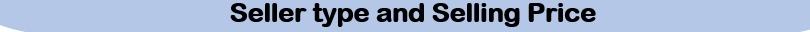

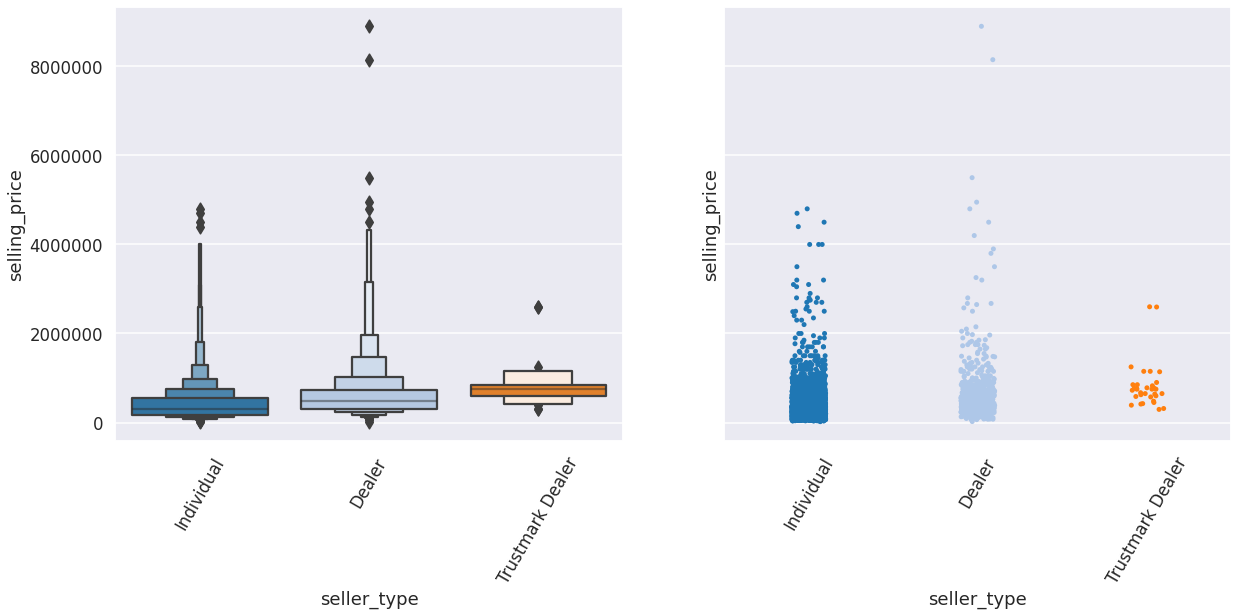

In [12]:
create_plot(df, "seller_type", "selling_price")

In [13]:
create_desc(df, "seller_type", "selling_price")

,name,total,q1,q3,mean,median,std
0,Dealer,712,305000.00,724250.00,652699.39,484999.00,728405.46
1,Individual,2832,175000.00,550000.00,424904.02,303500.00,423731.09
2,Trustmark Dealer,33,585000.00,850000.00,822272.73,750000.00,514420.32


### > The chart and description table above show that Trustmark Dealer sells expensive cars in general, followed by Dealer

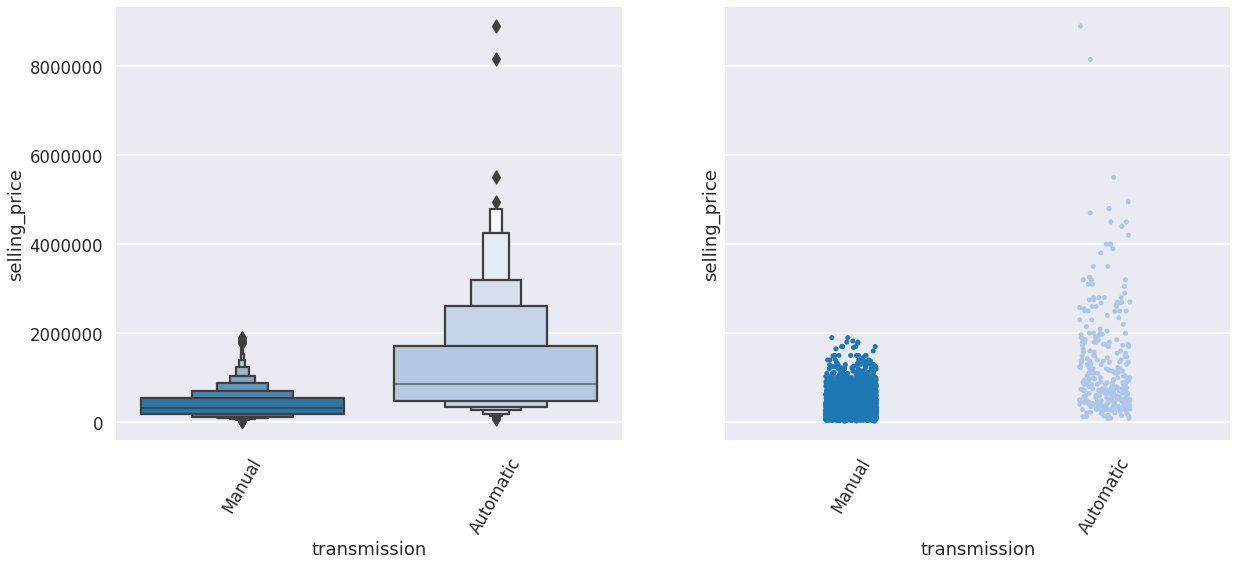

In [14]:
create_plot(df, "transmission", "selling_price")

In [15]:
create_desc(df, "transmission", "selling_price")

,name,total,q1,q3,mean,median,std
0,Automatic,312,474000.00,1706250.00,1274955.11,855000.00,1202845.71
1,Manual,3265,190000.00,550000.00,397365.75,325000.00,281297.30


### > Expensive cars mostly use automatic transmission

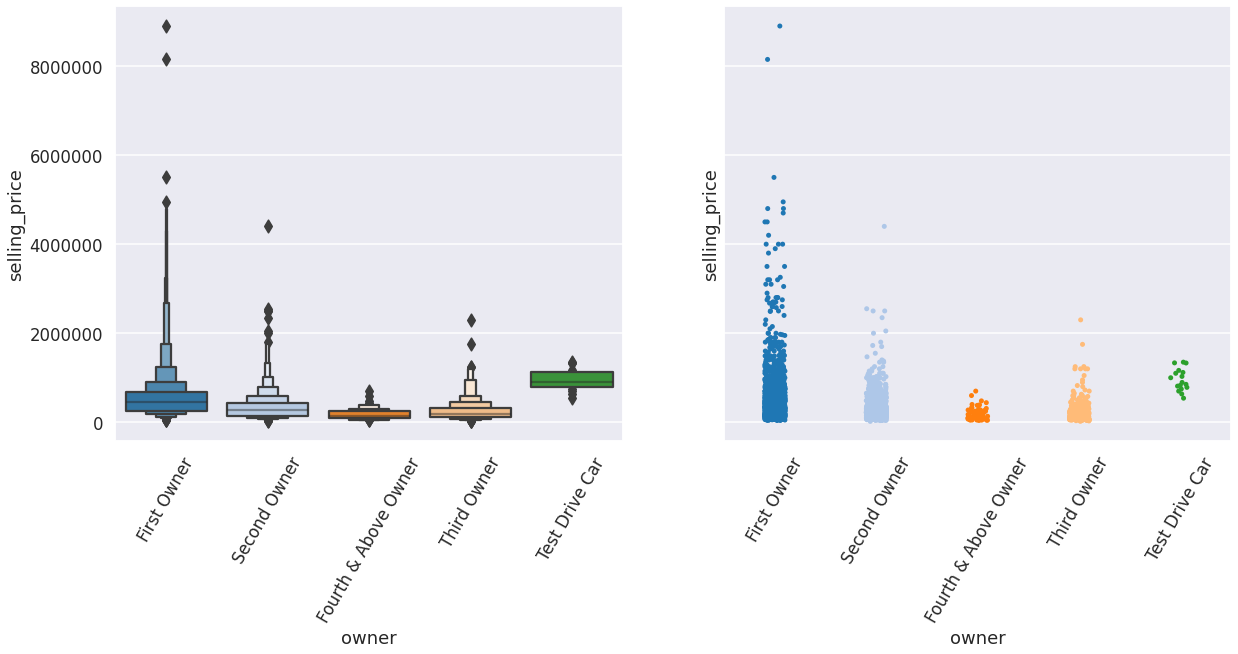

In [16]:
create_plot(df, "owner", "selling_price")

In [17]:
create_desc(df, "owner", "selling_price")

,name,total,q1,q3,mean,median,std
0,First Owner,2218,260750.00,675000.00,565385.45,450000.00,579416.32
1,Fourth & Above Owner,75,100000.00,250000.00,181213.29,138000.00,128106.82
2,Second Owner,978,150000.00,430000.00,341954.14,267000.00,323819.99
3,Test Drive Car,17,784000.00,1119000.00,954293.94,894999.00,250372.50
4,Third Owner,289,120000.00,320000.00,266142.21,190000.00,264813.74


### > From the chart and the description table, expensive cars mostly owned by Test Drive Car followed by First Owner

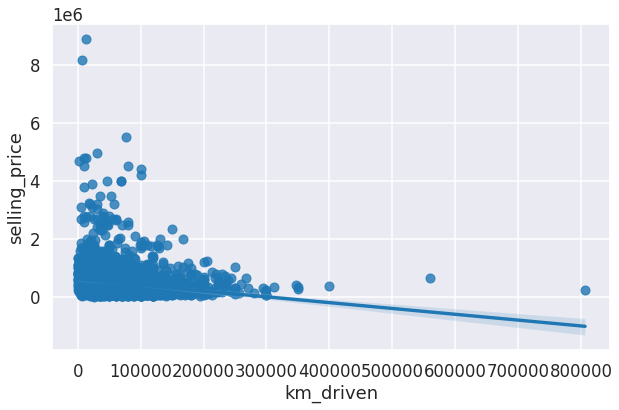

In [18]:
create_regplot(df, "km_driven", "selling_price")

### > According to the plot of km driven versus selling price, the higher the km driven, the lower the selling price.

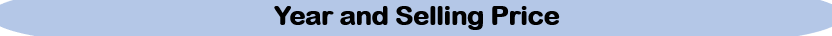

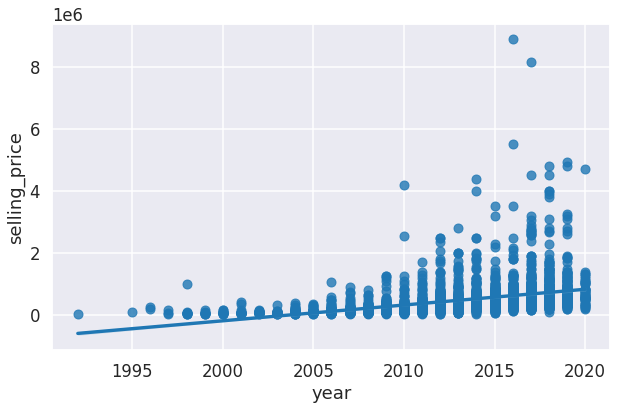

In [19]:
create_regplot(df, "year", "selling_price")

### > From the plot, the newer the cars, the more expensive their prices.

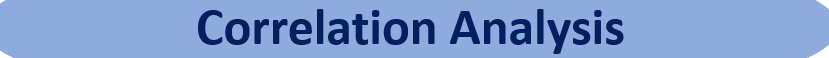

In [20]:
data =  df.copy()
data.drop("name", axis=1, inplace=True)


profile = ProfileReport(data)

correlations = profile.description_set["correlations"]
phik_corr = correlations["phi_k"]
phik_corr.style.background_gradient(cmap="PuBu")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
year,1.00,0.21,0.29,0.23,0.32,0.13,0.42
selling_price,0.21,1.00,0.01,0.16,0.13,0.66,0.12
km_driven,0.29,0.01,1.00,0.22,0.18,0.07,0.23
fuel,0.23,0.16,0.22,1.00,0.03,0.05,0.03
seller_type,0.32,0.13,0.18,0.03,1.00,0.09,0.25
transmission,0.13,0.66,0.07,0.05,0.09,1.00,0.05
owner,0.42,0.12,0.23,0.03,0.25,0.05,1.00


### > Based on phik correlation analysis, transmission has the highest correlation with selling price, followed by year, fuel, seller_type and owner. While km_driven almost has no correlation (0.01) with selling price

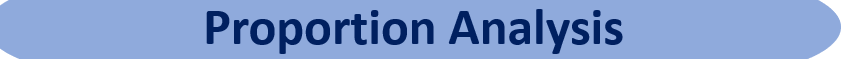

### > In this proportion analysis, we will determine what the 100 most expensive and 100 cheapest cars have in common.

In [21]:
# Create function to display proportion of the feature the largest and smallest car prices

def create_proportion(car_smallest, car_largest, feat):
    a = list(car_smallest[feat].unique())
    b = list(car_largest[feat].unique())
    prop = list(set(a+b))
    
    smallest = car_smallest.groupby(feat)[feat].count()/100
    largest = car_largest.groupby(feat)[feat].count()/100
    
    smallest_list = []
    largest_list = []
    
    for i in prop:
        if i in list(smallest.index):
            smallest_list.append(smallest[i])
        else:
            smallest_list.append(0)
        
        if i in list(largest.index):
            largest_list.append(largest[i])
        else:
            largest_list.append(0)
    
    dict = {feat:prop, "smallest":smallest_list, "largest":largest_list}
    
    return pd.DataFrame(dict).style.background_gradient(cmap="PuBu")       

In [22]:
# Retrieve 100 the most expensive cars
car_smallest = data.nsmallest(100, "selling_price")

# Retrieve 100 the cheapest cars
car_largest = data.nlargest(100, "selling_price")


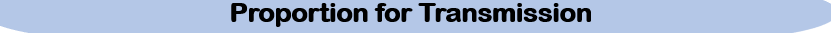

In [23]:
#create proportion for transmission
create_proportion(car_smallest, car_largest, "transmission")

,transmission,smallest,largest
0,Automatic,0.00,0.87
1,Manual,1.00,0.13


### > As we can see, 87% of the most expensive cars use Automatic transmission, while all the cheapest cars use Manual transmission.

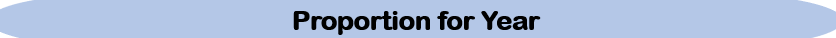

In [24]:
#create proportion for year
create_proportion(car_smallest, car_largest, "year")

,year,smallest,largest
0,1992,0.01,0.00
1,1997,0.01,0.00
2,1998,0.06,0.00
3,1999,0.05,0.00
4,2000,0.07,0.00
5,2001,0.08,0.00
6,2002,0.07,0.00
7,2003,0.10,0.00
8,2004,0.05,0.00
9,2005,0.13,0.00


### > the cheapest cars were manufactured between 1992 and 2004, while the most expensive cars were manufactured between 2010 and 2020. This result is in line with the regression plot that shows, the newer the car, the more expensive it is.

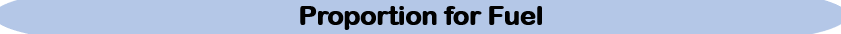

In [25]:
#create proportion for fuel
create_proportion(car_smallest, car_largest, "fuel")

,fuel,smallest,largest
0,Petrol,0.86,0.13
1,LPG,0.02,0.00
2,CNG,0.01,0.00
3,Diesel,0.11,0.87


### > 87% expensive cars use diesel which is the property of high selling prices.

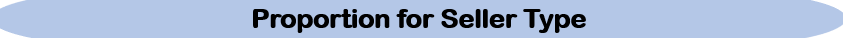

In [26]:
#create proportion for seller type
create_proportion(car_smallest, car_largest, "seller_type")

,seller_type,smallest,largest
0,Dealer,0.02,0.41
1,Individual,0.98,0.57
2,Trustmark Dealer,0.00,0.02


### > the most expensive and the cheapest cars mostly were sold by Individual

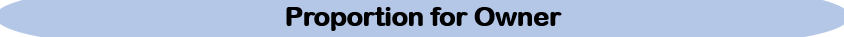

In [27]:
#create proportion for owner of the car
create_proportion(car_smallest, car_largest, "owner")

,owner,smallest,largest
0,Second Owner,0.37,0.11
1,First Owner,0.26,0.87
2,Fourth & Above Owner,0.11,0.00
3,Third Owner,0.26,0.02


### > 87% of the most expensive cars owned by the first Owner which explains why the cars have the higher selling price

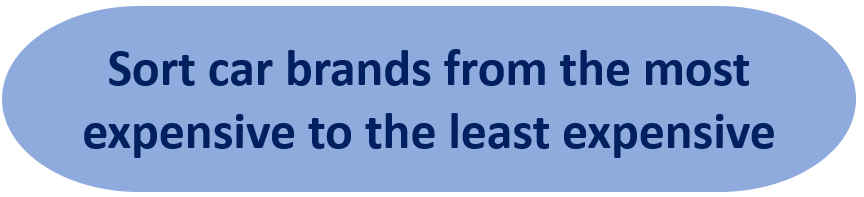

In [28]:
data["car_name"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:2]))

expensive =create_desc(data, "car_name", "selling_price")
expensive.data = expensive.data.sort_values(by=["median", "mean"], ascending=False)
expensive

,name,total,q1,q3,mean,median,std
10,Audi RS7,1,8900000.00,8900000.00,8900000.00,8900000.00,0.00
126,Mercedes-Benz S-Class,1,8150000.00,8150000.00,8150000.00,8150000.00,0.00
123,Mercedes-Benz GLS,1,5500000.00,5500000.00,5500000.00,5500000.00,0.00
15,BMW X5,1,4950000.00,4950000.00,4950000.00,4950000.00,0.00
4,Audi A5,1,4700000.00,4700000.00,4700000.00,4700000.00,0.00
187,Volvo XC,1,4500000.00,4500000.00,4500000.00,4500000.00,0.00
122,Mercedes-Benz GL-Class,1,4400000.00,4400000.00,4400000.00,4400000.00,0.00
78,Land Rover,5,3500000.00,4000000.00,3609800.00,4000000.00,750753.09
120,Mercedes-Benz C-Class,1,3800000.00,3800000.00,3800000.00,3800000.00,0.00
12,BMW 5,5,1200000.00,4800000.00,2836000.00,2900000.00,1996617.14
